In [2]:
import matplotlib as py
import pandas as pd
%matplotlib notebook
%matplotlib inline

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [8]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [15]:
pd.value_counts(df.rad)

24    88
5     76
4     70
3     27
8     18
2     14
1     14
7     13
6     13
Name: rad, dtype: int64

The variable for rad (radially close to number of highways) has an interesting split. I think this might show that different dispersals of pricing for high and low var numbers. 24 seems to be well above the mean (data is bimodal) for this variable so we shall split it there and investigate further.

In [17]:
df_low_rad = df.loc[df['rad']<24]
df_high_rad = df.loc[df['rad']==24]

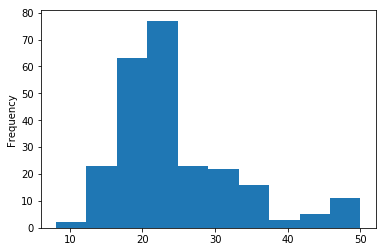

In [20]:
df_low_rad['medv'].plot(kind='hist')

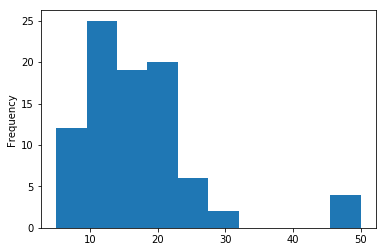

In [21]:
df_high_rad['medv'].plot(kind='hist')

Interesting. It seems like there is some second mode for high value properties which isn't strongly correlated to "rad". Let's look for what determines value. First let's find where the exact split in 'medv' seems to be, then let's describe the properties of high vs low 'medv's. Then finally let's look for variable clustering around values.

In [29]:
df['medv'].value_counts(bins=45).sort_index()

(4.954, 6.0]     2
(6.0, 7.0]       1
(7.0, 8.0]       3
(8.0, 9.0]       7
(9.0, 10.0]      2
(10.0, 11.0]     6
(11.0, 12.0]     7
(12.0, 13.0]     6
(13.0, 14.0]    13
(14.0, 15.0]    12
(15.0, 16.0]     8
(16.0, 17.0]    11
(17.0, 18.0]    16
(18.0, 19.0]    14
(19.0, 20.0]    30
(20.0, 21.0]    21
(21.0, 22.0]    19
(22.0, 23.0]    22
(23.0, 24.0]    28
(24.0, 25.0]    23
(25.0, 26.0]     3
(26.0, 27.0]     6
(27.0, 28.0]     7
(28.0, 29.0]     5
(29.0, 30.0]     3
(30.0, 31.0]     6
(31.0, 32.0]     6
(32.0, 33.0]     6
(33.0, 34.0]     4
(34.0, 35.0]     2
(35.0, 36.0]     4
(36.0, 37.0]     6
(37.0, 38.0]     3
(38.0, 39.0]     0
(39.0, 40.0]     1
(40.0, 41.0]     0
(41.0, 42.0]     1
(42.0, 43.0]     1
(43.0, 44.0]     2
(44.0, 45.0]     1
(45.0, 46.0]     1
(46.0, 47.0]     0
(47.0, 48.0]     0
(48.0, 49.0]     3
(49.0, 50.0]    11
Name: medv, dtype: int64

Let's say high values start at medv>40.

In [30]:
df_high_val = df.loc[df['medv']>40]
df_low_val = df.loc[df['medv']<40]

In [31]:
df_high_val.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,255.35000,1.891466,19.100000,9.303500,0.250000,0.543105,7.618900,70.405000,3.251530,9.100000,363.900000,16.415000,382.833500,4.287500,47.875000
std,69.98592,2.893534,33.196227,7.246846,0.444262,0.090797,0.947031,28.416294,1.970812,7.846555,167.242622,2.618009,11.927601,2.067393,2.990313
min,162.00000,0.015010,0.000000,1.210000,0.000000,0.401000,4.970000,8.400000,1.129600,1.000000,193.000000,13.000000,347.880000,1.730000,41.700000
25%,204.75000,0.251820,0.000000,3.810000,0.000000,0.476725,7.484250,51.875000,2.027150,5.000000,254.000000,14.700000,376.682500,3.122500,45.700000
50%,244.00000,0.530525,0.000000,6.200000,0.000000,0.541000,7.888000,80.650000,2.883200,5.000000,307.000000,16.150000,386.385000,3.620000,50.000000
75%,283.25000,1.641812,20.000000,18.100000,0.250000,0.631000,8.260750,92.100000,4.158300,8.000000,403.000000,18.125000,390.925000,4.495000,50.000000
max,373.00000,9.232300,95.000000,19.580000,1.000000,0.668000,8.725000,100.000000,8.906700,24.000000,666.000000,20.200000,396.900000,9.530000,50.000000


In [32]:
df_low_val.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.670927,3.454199,10.151757,11.420639,0.047923,0.558041,6.179147,68.08722,3.739225,9.667732,412.178914,18.577955,357.972971,13.041182,21.164537
std,151.539610,7.540823,21.798395,6.974587,0.213946,0.116388,0.589746,28.15535,1.981307,8.806583,170.921616,2.056180,89.059274,6.948268,6.783454
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.00000,1.137000,1.000000,188.000000,12.600000,3.500000,1.980000,5.000000
25%,118.000000,0.078960,0.000000,5.190000,0.000000,0.453000,5.878000,45.10000,2.132900,4.000000,281.000000,17.400000,376.730000,7.670000,17.100000
50%,244.000000,0.241030,0.000000,9.900000,0.000000,0.538000,6.163000,76.70000,3.099300,5.000000,335.000000,19.100000,392.400000,11.650000,20.700000
75%,387.000000,3.693110,0.000000,18.100000,0.000000,0.624000,6.513000,93.80000,5.116700,24.000000,666.000000,20.200000,396.420000,16.940000,24.400000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.040000,100.00000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,39.800000


A quick look tells us that one obvious variable may be crime levels. Not all, but roughly half of low value properties have crime rates which fall well outside of the std of high value property crime rates. Let's check this in the next analysis of variables.

C:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


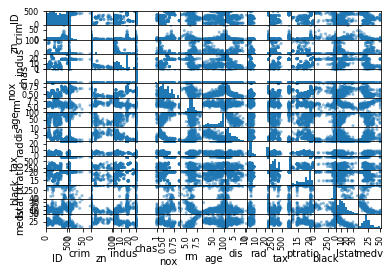

In [36]:
from pandas.tools.plotting import scatter_matrix;
scatter_matrix(df);

Very useful, but a silly choice for now. This gives us too much info. We can come back to this later to look for more correlations to investigate. For now let's try investigating high_val vs low_val using parallel plots. To make this easier let's create a binary label column for higher or lower values. 

In [52]:
df.loc[df["medv"]<40, "Val_Label"] = 0 #low value. We changed these labels to numbers because later normalising wouldn't work for text.
df.loc[df["medv"]>40, "Val_Label"] = 1 #High value

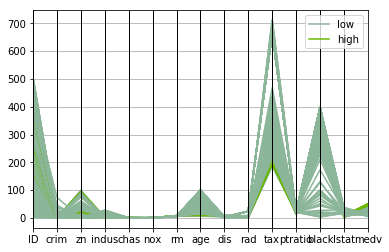

In [50]:
pd.plotting.parallel_coordinates(df,'Val_Label')

This would look much better and be easier for analysis if it were normalised and larger. Let's change that.

In [76]:
from sklearn import preprocessing
normalized_df = preprocessing.normalize(df.iloc[:,0:15])
normalized_df = pd.DataFrame(normalized_df,columns=df.columns[0:15])
normalized_df['Val_Label'] = df['Val_Label']
normalized_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Val_Label
0,0.001998,0.000013,0.035955,0.004614,0.0,0.001075,0.013134,0.130238,0.008170,0.001998,0.591264,0.030562,0.792813,0.009948,0.047940,0
1,0.004232,0.000058,0.000000,0.014961,0.0,0.000992,0.013588,0.166964,0.010511,0.004232,0.512108,0.037667,0.839899,0.019342,0.045709,0
2,0.008756,0.000071,0.000000,0.004772,0.0,0.001003,0.015318,0.100254,0.013270,0.006567,0.485945,0.040933,0.863823,0.006435,0.073111,0
3,0.010870,0.000150,0.000000,0.004740,0.0,0.000996,0.015538,0.117835,0.013180,0.006522,0.482647,0.040655,0.862894,0.011588,0.078702,0
4,0.013757,0.000174,0.024565,0.015466,0.0,0.001030,0.011815,0.130884,0.010928,0.009826,0.611186,0.029871,0.777444,0.024428,0.045004,0


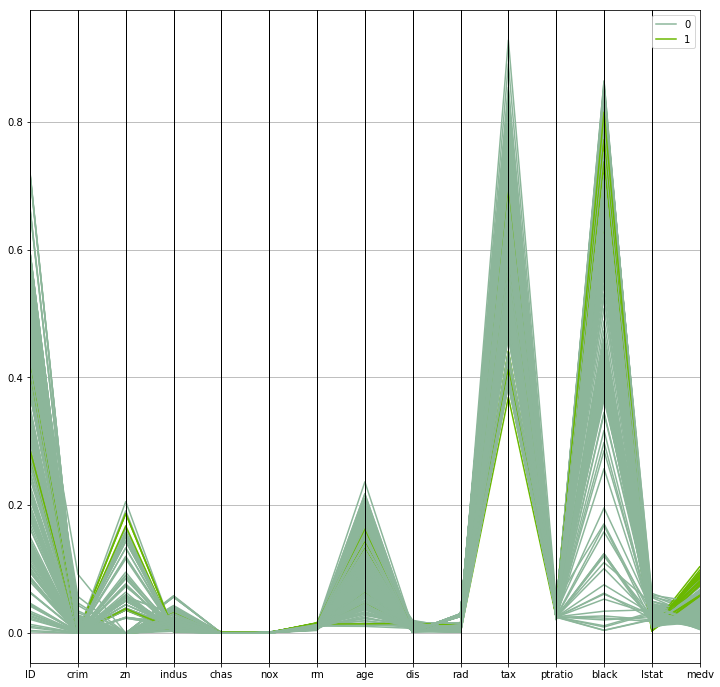

In [77]:
import matplotlib.pyplot as py
py.figure(figsize=(12,12))
pd.plotting.parallel_coordinates(normalized_df,'Val_Label')

Interesting.